In [1]:
import os
import glob as glob
import datetime as dt
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("C:/Users/gameon/Documents/Hamoye Internship/Project 1")

In [23]:
Startup = pd.read_csv('startup data.csv')

In [24]:
#Viewing and Examining our Data
Startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [25]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [26]:
Startup.describe(include='all')

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923,923.000000,923.000000,923,923,923,430,923,923.000000,...,923,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923
unique,NaN,35,NaN,NaN,382,922,221,252,922,NaN,...,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,CA,NaN,NaN,94107,c:28482,San Francisco,San Francisco CA 94105,Redwood Systems,NaN,...,c:28482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,NaN,488,NaN,NaN,30,2,128,12,2,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597
mean,572.297941,NaN,38.517442,-103.539212,NaN,NaN,NaN,NaN,NaN,0.646804,...,NaN,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,NaN
std,333.585431,NaN,3.741497,22.394167,NaN,NaN,NaN,NaN,NaN,0.478222,...,NaN,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,NaN
min,1.000000,NaN,25.752358,-122.756956,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,283.500000,NaN,37.388869,-122.198732,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,577.000000,NaN,37.779281,-118.374037,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,NaN
75%,866.500000,NaN,40.730646,-77.214731,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,NaN


In [27]:
#Checking for duplicates
Startup.duplicated().sum()

0

In [28]:
#From the Unique id under 'name' above, we check further for duplicates under name which is our main focus.
Startup[Startup.duplicated(subset=['name'])]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
832,505,CA,37.48151,-121.945328,94538,c:28482,Fremont,NaN,Redwood Systems,1,...,c:28482,1,0,1,1,1,0,2.25,1,acquired


In [29]:
Startup = Startup.drop_duplicates(subset=['name'])

In [30]:
#Checking for Missing Data
Startup.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  492
name                          0
labels                        0
founded_at                    0
closed_at                   587
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [31]:
#Dropping Columns that are not tangible to our analysis
Startup = Startup.drop(['Unnamed: 0', 'Unnamed: 6', 'latitude', 'longitude', 'zip_code', 'object_id', 'is_CA','is_NY', 'is_MA', 'is_TX', 'is_otherstate'], axis=1)
Startup.head()

,state_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,c:65620,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,...,0,1,1,0,0,0,0,1.0000,1,closed


###### Data Visualization

Text(0.5, 1.0, 'Categories of Startups')

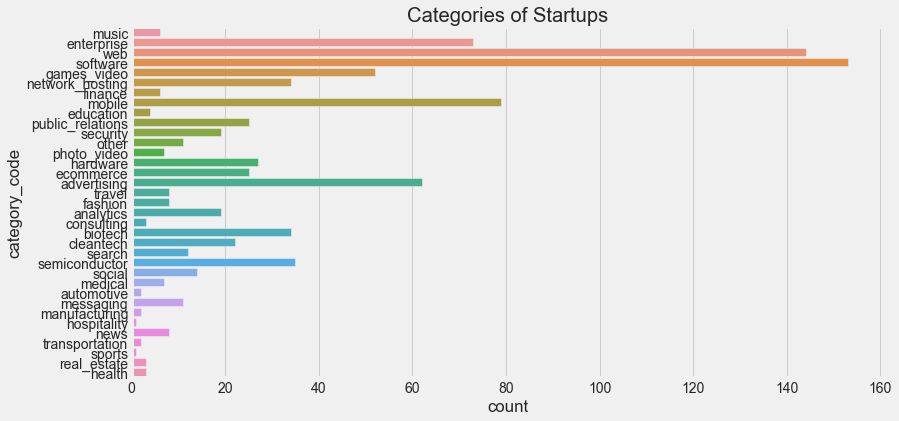

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(y = Startup['category_code']).set_title('Categories of Startups')

Text(0.5, 1.0, 'Status Category')

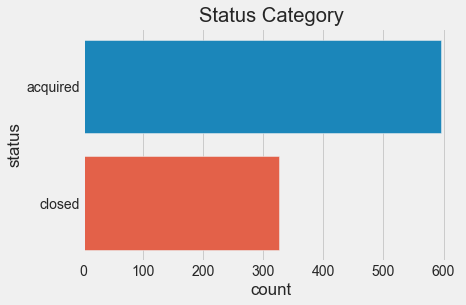

In [45]:
sns.countplot(y = Startup['status']).set_title('Status Category')

Text(0.5, 1.0, 'Categories of Startups')

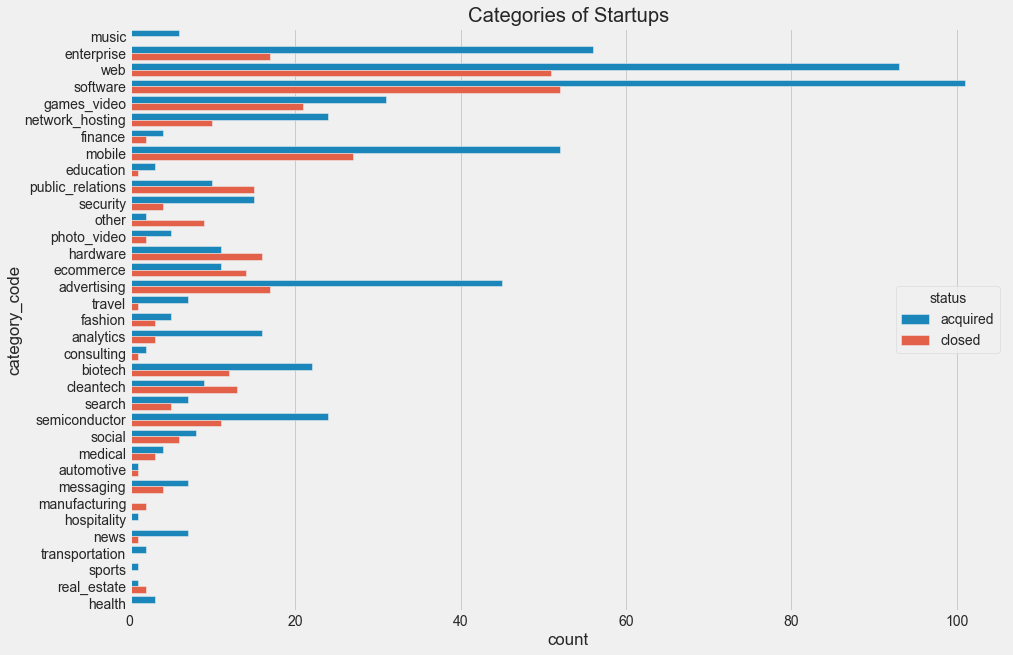

In [56]:
plt.figure(figsize=(14,10))
plt.ylabel('y-axis', labelpad=2)
sns.countplot(y = 'category_code', hue = 'status', data=Startup).set_title('Categories of Startups')

In [40]:
Startup.reset_index(inplace=True)

In [42]:
Startup.head()

,index,state_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,0,CA,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,1,CA,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,2,CA,c:65620,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,3,CA,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,4,CA,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,...,0,1,1,0,0,0,0,1.0000,1,closed
